In [32]:
import numpy as np
import matplotlib.pyplot as plt

import py.continuum1d as continuum1d

from py.params import setParams
# This will reload all imports as soon as the code changes
%load_ext autoreload
%autoreload 2 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
params=None
c1d = continuum1d.continuum1d(params)

1d Model initialised.


In [20]:
params = {'n': 512, 'length': 20, 'I_e': 2.5, 'I_i': 1.6}
ue4, ui4 = c1d.run(params, itype='inte_approxi')

Summe von ke, bereits normalisiert, also sollte 1 sein 1.0000000000000002


Text(0.5, 1.0, 'n=56, sum(ke)=0.9999999999999')

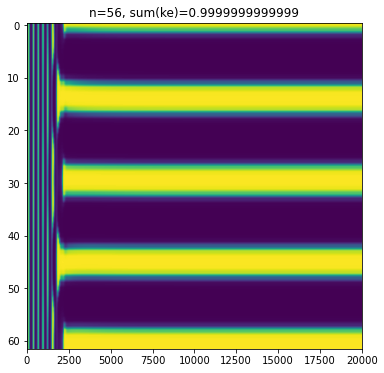

In [13]:
plt.figure(figsize=(6,6))
plt.imshow(ue.T, vmin=0.0, vmax=1, aspect='auto')
plt.title(label='n=56, sum(ke)=0.9999999999999')

Text(0.5, 1.0, 'n=62, sum(ke)=1.00000000002')

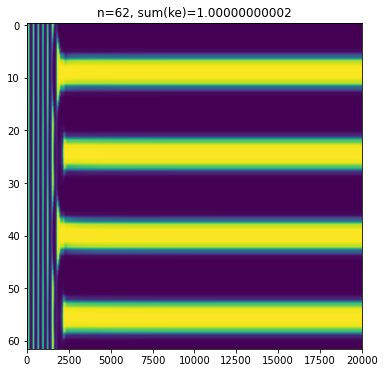

In [15]:
plt.figure(figsize=(6,6))
plt.imshow(ue2.T, vmin=0.0, vmax=1, aspect='auto')
plt.title(label='n=62, sum(ke)=1.00000000002')

Text(0.5, 1.0, 'n=188, sum(ke)=1.0')

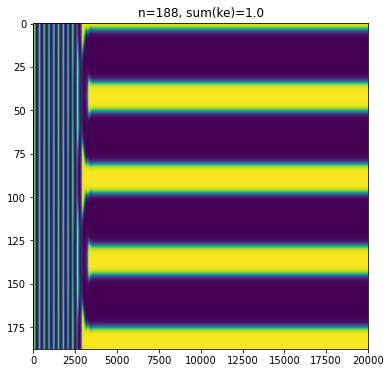

In [19]:
plt.figure(figsize=(6,6))
plt.imshow(ue3.T, vmin=0.0, vmax=1, aspect='auto')
plt.title(label='n=188, sum(ke)=1.0')

Text(0.5, 1.0, 'n=512, sum(ke)=1.000000000002')

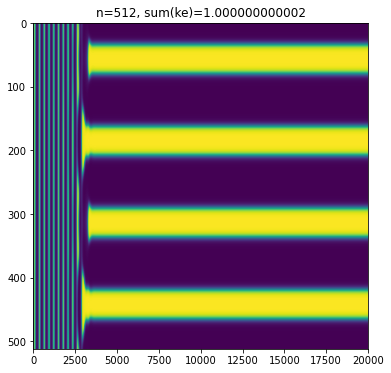

In [21]:
plt.figure(figsize=(6,6))
plt.imshow(ue4.T, vmin=0.0, vmax=1, aspect='auto')
plt.title(label='n=512, sum(ke)=1.000000000002')#, l=512 (others: l=150)')

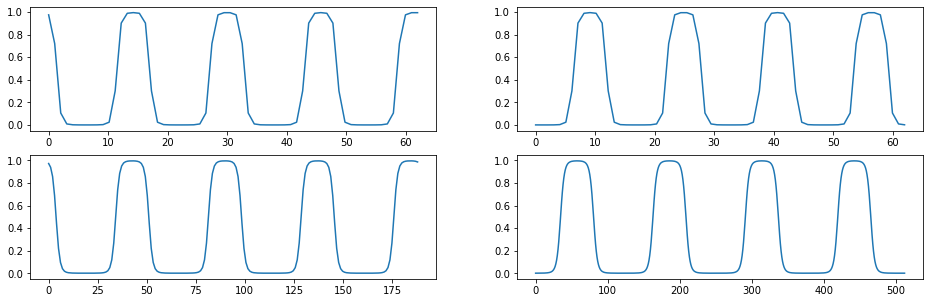

In [22]:
a=ue[-10]
b=ue2[-10]
c=ue3[-10]
d=ue4[-10]
fig, ((ax1, ax2), (ax3,ax4)) = plt.subplots(2, 2, figsize=(16,5))


ax1.plot(np.linspace(0,a.shape[0], a.shape[0]), a)
ax2.plot(np.linspace(0,b.shape[0], b.shape[0]), b)
ax3.plot(np.linspace(0,c.shape[0], c.shape[0]), c)
ax4.plot(np.linspace(0,d.shape[0], d.shape[0]), d)


Text(0.5, 1.0, 'n=512, sum(ke)=1.000000000002')

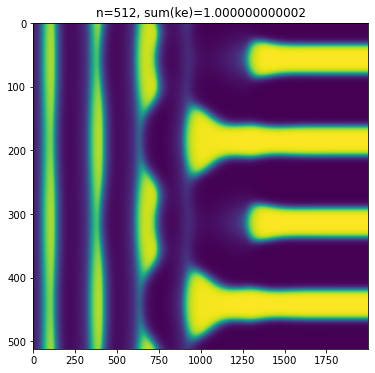

In [162]:
plt.figure(figsize=(6,6))
plt.imshow(ue4.T[:,2000:4000], vmin=0.0, vmax=1, aspect='auto')
plt.title(label='n=512, sum(ke)=1.000000000002')#, l=512 (others: l=150)')

In [135]:
params = {'tau_e': 1, 'tau_i': 0.1,
        'w_ee': 1, 'w_ei': 1.5, 'w_ie': 1, 'w_ii': 0.25,
        'sigma_e': 1, 'sigma_i': 3, 'kernel': 'exponential', 
        'mu_e': 0, 'mu_i': 0, 'beta_e': 50, 'beta_i': 50,
        'I_e': -0.1, 'I_i': -0.4,
        'dt': 0.1, 'start_t': 0, 'end_t': 1000, 
        'n': 512, 'length': 120}


In [136]:
ps = setParams(params)
ps

Summe von ke, bereits normalisiert, also sollte 1 sein 1.0


{'mtype': 'activity',
 'tau_e': 1,
 'tau_i': 0.1,
 'w_ee': 1,
 'w_ei': 1.5,
 'w_ie': 1,
 'w_ii': 0.25,
 'beta_e': 50,
 'beta_i': 50,
 'mu_e': 0,
 'mu_i': 0,
 'kernel': 'exponential',
 'sigma_e': 1,
 'sigma_i': 3,
 'I_e': -0.1,
 'I_i': -0.4,
 'dt': 0.1,
 'start_t': 0,
 'end_t': 1000,
 'n': 512,
 'length': 120,
 'c': 10000,
 'time': array([0.000e+00, 1.000e-01, 2.000e-01, ..., 9.998e+02, 9.999e+02,
        1.000e+03]),
 'x': array([ 0.      ,  0.234375,  0.46875 ,  0.703125,  0.9375  ,  1.171875,
         1.40625 ,  1.640625,  1.875   ,  2.109375,  2.34375 ,  2.578125,
         2.8125  ,  3.046875,  3.28125 ,  3.515625,  3.75    ,  3.984375,
         4.21875 ,  4.453125,  4.6875  ,  4.921875,  5.15625 ,  5.390625,
         5.625   ,  5.859375,  6.09375 ,  6.328125,  6.5625  ,  6.796875,
         7.03125 ,  7.265625,  7.5     ,  7.734375,  7.96875 ,  8.203125,
         8.4375  ,  8.671875,  8.90625 ,  9.140625,  9.375   ,  9.609375,
         9.84375 , 10.078125, 10.3125  , 10.546875, 10.7

In [137]:
def runIntegration(params, fp=np.array([0.0, 0.01]), itype='inte_fft',):
    
    """
    Before we can run the integration-loop, we have to set the parameters and call the integration by them 
    s.t. nothing's accidentally overwritten.
    """
    
    mtype = params.mtype
    
    #membrane time constants [no units yet]
    tau_e = params.tau_e
    tau_i = params.tau_i
    
    #coupling weights (determining the dominant type of cells, e.g. locally excitatory...)
    w_ee = params.w_ee
    w_ei = params.w_ei
    w_ie = params.w_ie
    w_ii = params.w_ii
    
    #threshold and gain factors for the sigmoidal activation functions 
    beta_e = params.beta_e
    beta_i = params.beta_i
    mu_e = params.mu_e
    mu_i = params.mu_i
    
    #external input currents: oscillatory state for default params
    I_e = params.I_e
    I_i = params.I_i

    #temporal 
    dt = params.dt
    
    #spatial
    n = params.n
    length = params.length
    c = params.c
    
    x = params.x
    dx = params.dx
    time = params.time
    
    ke = params.ke
    ki = params.ki
    
    ke_fft = params.ke_fft
    ki_fft = params.ki_fft
    
    delay = params.delay
    
    
    comparison = fp==[0.0,0.01]
    
    if all(comparison):
        init_exc = fp
        init_inh = fp
    else:
        init_exc = [fp[0]-0.1*(10**(-6)), fp[0]+0.1*(10**(-6))]
        init_inh = [fp[1]-0.1*(10**(-6)), fp[1]+0.1*(10**(-6))]
    
    #the initialisation I have to make to start the integration
    ue_init = np.zeros((len(time),n)) #leads to [rows, columns] = [time, pixels (space)]
    ui_init = np.zeros((len(time),n))
    ue_init[0]=np.random.uniform(init_exc[0], init_exc[1], n)
    ui_init[0]=np.random.uniform(init_inh[0], init_inh[1], n)
    
    
    integrate = globals()[itype]
    
    ue, ui =  integrate(mtype,
                        tau_e, tau_i,
                        w_ee, w_ei, w_ie, w_ii,
                        beta_e, beta_i, mu_e, mu_i,
                        I_e, I_i,
                        dt, time, delay, 
                        n, length, c, x, dx, 
                        ke, ki, ke_fft, ki_fft,
                        ue_init, ui_init)
    
    
    return ue, ui

In [138]:
def inte_fft(mtype,
             tau_e, tau_i,
             w_ee, w_ei, w_ie, w_ii,
             beta_e, beta_i, mu_e, mu_i,
             I_e, I_i,
             dt, time, delay, 
             n, length, c, x, dx, 
             ke, ki, ke_fft, ki_fft,
             ue, ui):
    
    def Fe(x):
        return 1/(1+np.exp(-beta_e*(x-mu_e)))
    
    def Fi(x):
        return 1/(1+np.exp(-beta_i*(x-mu_i)))
    
    d_max = max(delay)
    
    ke_fft = np.fft.fft(ke)
    ki_fft = np.fft.fft(ki)
    
    for t in range(1,int(len(time))): 
        
        #indeces for delays - makes the delayed time steps easier to call
        indeces = np.array([t*np.ones(n)-delay]).astype(int)
        
        if mtype=='activity':
            if t<=d_max+1:
                ve = np.fft.fft(ue[t-1])
                vi = np.fft.fft(ui[t-1])
            else:
                temp_e = ue[indeces,0]
                temp_i = ui[indeces,0]
                ve = np.fft.fft(temp_e)[0]
                vi = np.fft.fft(temp_i)[0]
        else:
            ve = np.fft.fft(Fe(ue[t-1]))
            vi = np.fft.fft(Fi(ui[t-1]))
        
        Le = np.multiply(ke_fft, ve)
        Li = np.multiply(ki_fft, vi)
        
        conv_e = np.fft.ifft(Le).real
        conv_i = np.fft.ifft(Li).real
        
        
        #determine the RHS before integrating over it w.r.t. time t
        if mtype=='activity':
            rhs_e = ((1/tau_e)*(-ue[t-1] + Fe(w_ee*conv_e - w_ei*conv_i + I_e)))
            rhs_i = ((1/tau_i)*(-ui[t-1] + Fi(w_ie*conv_e - w_ii*conv_i + I_i)))
        else:
            rhs_e = ((1/tau_e)*(-ue[t-1] + w_ee*conv_e - w_ei*conv_i + I_e))
            rhs_i = ((1/tau_i)*(-ui[t-1] + w_ie*conv_e - w_ii*conv_i + I_i))
        
        
        #integrate with euler integration
        ue[t] = ue[t-1] + (dt * rhs_e)
        ui[t] = ui[t-1] + (dt * rhs_i)
        
        
  #      print('# # - - NEW ROUND - - # #')
  #      print('t: ', t)
  #      print('ue: ', ue)
        
  #      print('ve: ', ve)
  #      print('ke_fft: ', ke_fft)
    
    return ue, ui



In [139]:
# # # - - - Integration with integral approximation of convolution - - - # # #

def inte_approxi(mtype,
                 tau_e, tau_i,
                 w_ee, w_ei, w_ie, w_ii,
                 beta_e, beta_i, mu_e, mu_i,
                 I_e, I_i,
                 dt, time, delay, 
                 n, length, c, x, dx, 
                 ke, ki, ke_fft, ki_fft,
                 ue, ui):
    
    def Fe(x):
        return 1/(1+np.exp(-beta_e*(x-mu_e)))
    
    def Fi(x):
        return 1/(1+np.exp(-beta_i*(x-mu_i)))
    
    d_max = max(delay)
    indices = np.linspace(0,n-1, n).astype(int)
    
    ke_mtx = np.zeros((n,n))
    ki_mtx = np.zeros((n,n))
    delay_mtx = np.zeros((n,n)).astype(int)
    
    for j in range(n):
        ke_mtx[j] = np.roll(ke, j)
        ki_mtx[j] = np.roll(ki, j)
        delay_mtx[j] = np.roll(delay, j).astype(int)
    
    
    for t in range(1,int(len(time))): 
        
        L_e=np.zeros(n)
        L_i=np.zeros(n)
        
        if mtype=='activity':
            if t<=d_max+1:
                
                for j in range(n):
                    L_e[j] = (ke_mtx[j] @ ue[t-1])
                    L_i[j] = (ki_mtx[j] @ ui[t-1])
            else:
                for j in range(n):
                    temp_e = ue[t-delay_mtx[j], indices]
                    temp_i = ui[t-delay_mtx[j], indices]
                    L_e[j] = (ke_mtx[j] @ temp_e)
                    L_i[j] = (ki_mtx[j] @ temp_i)
        else:
            if t<=d_max+1:
                for j in range(n):
                    L_e[j] = ke_mtx[j] @ Fe(ue[t-1])
                    L_i[j] = ki_mtx[j] @ Fi(ui[t-1])
            else:
                for j in range(n):
                    temp_e = ue[t-delay_mtx[j], indices]
                    temp_i = ui[t-delay_mtx[j], indices]
                    L_e[j] = ke_mtx[j] @ Fe(temp_e)
                    L_i[j] = ki_mtx[j] @ Fi(temp_i)
            
        conv_e = L_e
        conv_i = L_i
        
        
        #determine the RHS before integrating over it w.r.t. time t
        if mtype=='activity':
            rhs_e = ((1/tau_e)*(-ue[t-1] + Fe(w_ee*conv_e - w_ei*conv_i + I_e)))
            rhs_i = ((1/tau_i)*(-ui[t-1] + Fi(w_ie*conv_e - w_ii*conv_i + I_i)))
        else:
            rhs_e = ((1/tau_e)*(-ue[t-1] + w_ee*conv_e - w_ei*conv_i + I_e))
            rhs_i = ((1/tau_i)*(-ui[t-1] + w_ie*conv_e - w_ii*conv_i + I_i))
        
        
        #integrate with euler integration
        ue[t] = ue[t-1] + (dt * rhs_e)
        ui[t] = ui[t-1] + (dt * rhs_i)
        
        
    #    print('# # - - NEW ROUND - - # #')
    #    print('t: ', t)
        
    #    print('conv_e: ', conv_e)
    #    print('ke_mtx: ', ke_mtx)
    #    print('ue: ', ue)
    #    if all(conv_e==ue[t-1]):
    #        print('approximation by convolution is the exact same as activity one step before. does that make sense? I dont think so')
        
        
    return ue, ui

In [140]:
uexc, uinh = runIntegration(ps, fp=np.array([0.73, 0.22]))

AttributeError: 'AxesImage' object has no attribute 'title'

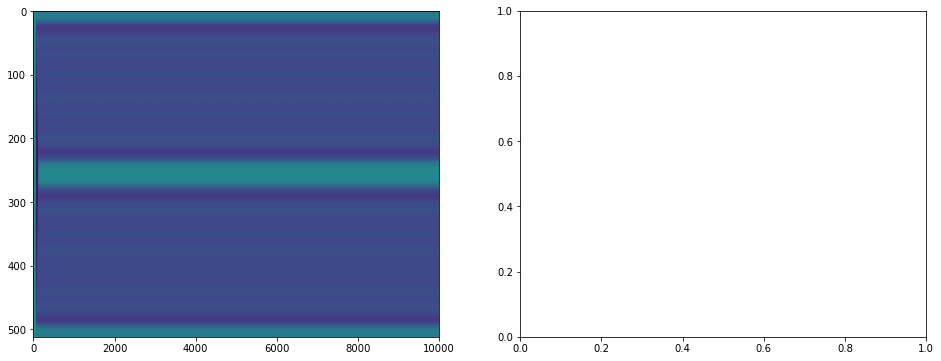

In [160]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6))
im1 = ax1.imshow(uexc.T, vmin=0, vmax=1, aspect='auto')
im1.title(label='with fourier transform')
ax2.imshow(uf.T, vmin=0, vmax=1, aspect='auto')
ax1.title(label='with integral approximation')

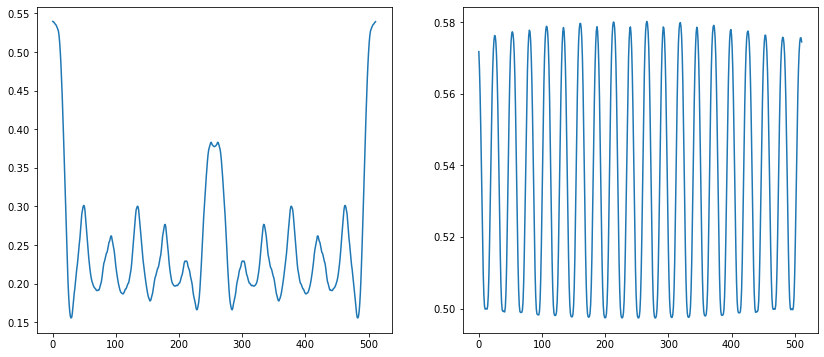

In [156]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,6))
ax1.plot(uexc[-10])
ax2.plot(uf[-10])

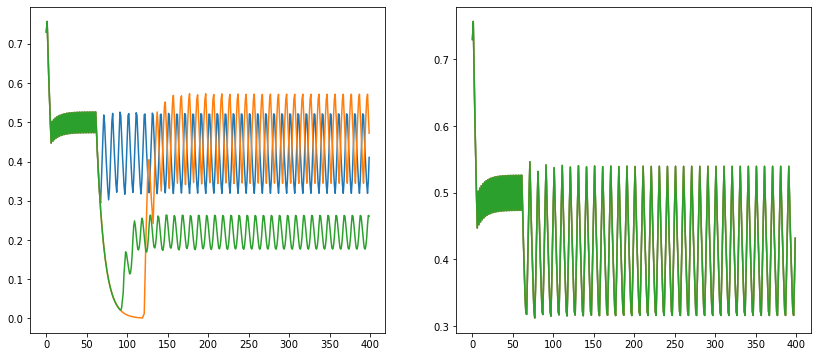

In [154]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,6))
ax1.plot(uexc.T[-10][0:400])
ax2.plot(uf.T[-10][0:400])


ax1.plot(uexc.T[-250][0:400])
ax2.plot(uf.T[-250][0:400])


ax1.plot(uexc.T[-388][0:400])
ax2.plot(uf.T[-388][0:400])

In [144]:
uf, uif = runIntegration(ps, itype='inte_approxi', fp=np.array([0.73, 0.22]))

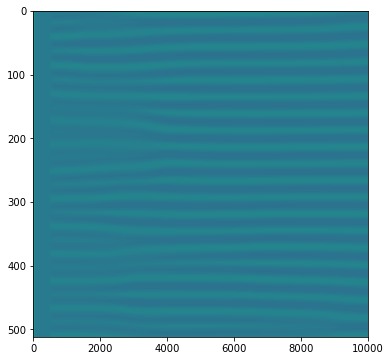

In [145]:
plt.figure(figsize=(6,6))
plt.imshow(uf.T, vmin=0.0, vmax=1, aspect='auto')

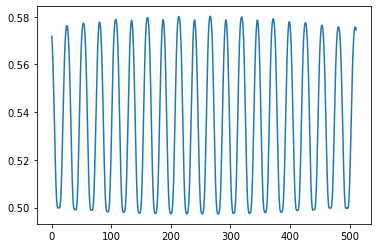

In [146]:
plt.plot(uf[-10])

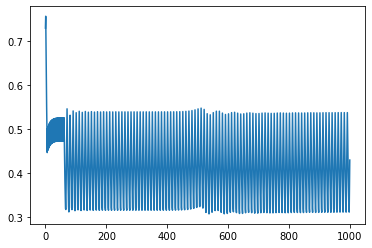

In [149]:
plt.plot(uf.T[-10][0:1000])